Import All Modules

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Conv1D, MaxPooling1D, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Ensure TensorFlow uses GPU if available
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
        print("GPU is available and memory growth is set.")
    except RuntimeError as e:
        print(e)
else:
    print("GPU not available, using CPU.")
    
import tensorflow as tf

# Check if GPUs are available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
else:
    print("No GPUs found. Using CPU.")

GPU not available, using CPU.
No GPUs found. Using CPU.


In [23]:
def getMaximumProfit(Arr, n):
    if n == 0:
        return 0, []  # If there are no stocks, the profit is zero and no actions

    # Initialize the DP table and action table
    dp = [[0 for _ in range(2)] for _ in range(n + 1)]
    action = [['' for _ in range(2)] for _ in range(n)]

    # Fill the DP table and action table from bottom-up
    for ind in range(n - 1, -1, -1):
        for buy in range(2):
            if buy == 0:
                buy_profit = -Arr[ind] + dp[ind + 1][1]
                hold_profit = dp[ind + 1][0]
                if buy_profit > hold_profit:
                    dp[ind][buy] = buy_profit
                    action[ind][buy] = 'buy'
                else:
                    dp[ind][buy] = hold_profit
                    action[ind][buy] = 'hold'
            else:
                sell_profit = Arr[ind] + dp[ind + 1][0]
                hold_profit = dp[ind + 1][1]
                if sell_profit > hold_profit:
                    dp[ind][buy] = sell_profit
                    action[ind][buy] = 'sell'
                else:
                    dp[ind][buy] = hold_profit
                    action[ind][buy] = 'hold'

    max_profit = dp[0][0]

    # Retrieve the action list
    actions = []
    ind, buy = 0, 0
    while ind < n:
        actions.append(action[ind][buy])
        if action[ind][buy] == 'buy':
            buy = 1
        elif action[ind][buy] == 'sell':
            buy = 0
        ind += 1

    return max_profit, actions

Create Actiosn DataSet

In [45]:
# Load dataset
dataset = read_csv('Data\SP500_train.csv', index_col=0)
dataset.fillna(method='ffill', inplace=True)

# Extract closing values
closing_values = list(dataset["close"])
print("dgvdfg")
# Apply the algorithm to the closing values
max_profit, actions = getMaximumProfit(closing_values,len(closing_values))

# Create action columns
dataset['Action_hold'] = [1 if action == 'hold' else 0 for action in actions]
dataset['Action_buy'] = [1 if action == 'buy' else 0 for action in actions]
dataset['Action_sell'] = [1 if action == 'sell' else 0 for action in actions]

# Save the result to a new CSV file
dataset.to_csv('Data/SP500_action.csv')

print(f"Maximum Profit: {max_profit}")
print("Dataset with actions saved to 'Data/BAJAJFINSV_action.csv'")

dgvdfg
Maximum Profit: 7210.570926000004
Dataset with actions saved to 'Data/BAJAJFINSV_action.csv'


In [52]:

# Count the number of 'buy' and 'sell' actions
buy_count = actions.count('buy')
sell_count = actions.count('sell')
hold_count = actions.count('hold')
print("No of Buys" , buy_count)
print("No of Sells" , sell_count)
print("No of Holds" , hold_count)


#Check if buy and sells are valid
# Check if there are any sells without buying
def check_invalid_sells(actions):
    has_stock = False
    for action in actions:
        if action == 'buy':
            has_stock = True
        elif action == 'sell':
            if not has_stock:
                return True
            has_stock = False
    return False

invalid_sells = check_invalid_sells(actions)
print("Sales Invalid :", invalid_sells)

No of Buys 329
No of Sells 329
No of Holds 600
Sales Invalid : False


In [47]:
actions

['buy',
 'hold',
 'sell',
 'buy',
 'hold',
 'hold',
 'hold',
 'sell',
 'buy',
 'hold',
 'hold',
 'hold',
 'hold',
 'sell',
 'buy',
 'sell',
 'hold',
 'hold',
 'hold',
 'buy',
 'hold',
 'hold',
 'sell',
 'buy',
 'hold',
 'hold',
 'sell',
 'buy',
 'sell',
 'hold',
 'buy',
 'hold',
 'hold',
 'sell',
 'buy',
 'hold',
 'hold',
 'hold',
 'sell',
 'buy',
 'sell',
 'hold',
 'hold',
 'buy',
 'hold',
 'hold',
 'hold',
 'hold',
 'sell',
 'buy',
 'hold',
 'hold',
 'sell',
 'hold',
 'hold',
 'buy',
 'hold',
 'sell',
 'hold',
 'hold',
 'buy',
 'hold',
 'sell',
 'hold',
 'hold',
 'hold',
 'hold',
 'buy',
 'hold',
 'sell',
 'hold',
 'buy',
 'sell',
 'hold',
 'buy',
 'sell',
 'buy',
 'hold',
 'hold',
 'hold',
 'sell',
 'buy',
 'sell',
 'hold',
 'hold',
 'buy',
 'sell',
 'hold',
 'buy',
 'sell',
 'hold',
 'hold',
 'hold',
 'hold',
 'hold',
 'buy',
 'hold',
 'hold',
 'hold',
 'sell',
 'buy',
 'sell',
 'hold',
 'hold',
 'buy',
 'hold',
 'hold',
 'sell',
 'buy',
 'sell',
 'buy',
 'sell',
 'buy',
 'hold',
 

In [48]:
buy_signals = dataset[dataset['Action_buy'] == 1].index
sell_signals = dataset[dataset['Action_sell'] == 1].index

buy_signal_positions = [dataset.index.get_loc(date) for date in buy_signals]
sell_signal_positions = [dataset.index.get_loc(date) for date in sell_signals]

plt.figure(figsize=(10, 5))
plt.style.use('fast')
plt.plot(dataset['close'], color='r', lw=2.)
plt.plot(dataset['close'], '^', markersize=10, color='g', label='Buy signal', markevery=buy_signal_positions)
plt.plot(dataset['close'], 'v', markersize=10, color='k', label='Sell signal', markevery=sell_signal_positions)
plt.title(f'Maximum Profit: ${max_profit:.2f}')
plt.legend()
plt.show()


KeyboardInterrupt: 

In [104]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Load the data (assuming 'BAJAJFINSV_action.csv' is in the 'Data' folder)
df = pd.read_csv('Data/BAJAJFINSV_action.csv', parse_dates=['date'], index_col='date')

# Keep only the first 300,000 rows
df = df.head(100000)

# Separate features and target
features = ['open', 'high', 'low', 'close', 'volume']
X = df[features]
y = df[['Action_hold', 'Action_buy', 'Action_sell']]

# Function to create sequences
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(time_steps, len(X)):
        Xs.append(X.iloc[(i - time_steps):i].values)
        ys.append(y.iloc[i].values)
    return np.array(Xs), np.array(ys)

time_steps = 60  # You can adjust this
X_train, y_train = create_sequences(X, y, time_steps)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

# Optionally, split the data into train and test sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.1, random_state=42, shuffle=False)

# Verify shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (99940, 60, 5)
y_train shape: (99940, 3)


In [101]:
y_train

<tf.Tensor: shape=(299940, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)>

In [102]:
X_train[1]

<tf.Tensor: shape=(60, 5), dtype=float32, numpy=
array([[ 144.9 ,  144.9 ,  144.9 ,  144.9 ,    0.  ],
       [ 144.9 ,  144.9 ,  144.9 ,  144.9 ,  710.  ],
       [ 144.9 ,  144.9 ,  144.6 ,  144.6 , 1020.  ],
       [ 144.6 ,  145.2 ,  144.5 ,  145.2 ,  920.  ],
       [ 145.2 ,  145.2 ,  144.65,  145.05,   70.  ],
       [ 145.05,  145.05,  144.5 ,  144.75,  130.  ],
       [ 144.75,  144.75,  144.75,  144.75,    0.  ],
       [ 144.75,  144.75,  144.7 ,  144.7 ,  120.  ],
       [ 144.7 ,  145.  ,  144.7 ,  145.  ,   20.  ],
       [ 145.  ,  145.  ,  144.8 ,  144.8 ,   40.  ],
       [ 144.95,  144.95,  144.95,  144.95,  140.  ],
       [ 144.95,  144.95,  144.2 ,  144.7 ,  510.  ],
       [ 144.7 ,  144.7 ,  144.7 ,  144.7 ,    0.  ],
       [ 144.7 ,  144.7 ,  144.7 ,  144.7 ,    0.  ],
       [ 144.7 ,  144.7 ,  144.7 ,  144.7 ,    0.  ],
       [ 144.7 ,  145.  ,  144.5 ,  145.  ,  320.  ],
       [ 145.  ,  145.4 ,  144.8 ,  145.3 ,  810.  ],
       [ 145.3 ,  145.3 ,  144.9 

In [105]:
len(X_train)

99940

In [ ]:

import keras_tuner as kt
def model_builder(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters', min_value=32, max_value=128, step=32), kernel_size=3, activation='relu', input_shape=(time_steps, X.shape[1]), padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    
    for i in range(hp.Int('num_lstm_layers', 1, 3)):
        model.add(Bidirectional(LSTM(hp.Int(f'lstm_units_{i}', min_value=32, max_value=128, step=32), activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01))))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    
    model.add(LSTM(hp.Int('final_lstm_units', min_value=32, max_value=128, step=32), activation='tanh', return_sequences=False, kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('final_dropout', 0.1, 0.5, step=0.1)))
    
    for i in range(hp.Int('num_dense_layers', 1, 3)):
        model.add(Dense(hp.Int(f'dense_units_{i}', min_value=32, max_value=128, step=32), activation='relu', kernel_regularizer=l2(0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(hp.Float(f'dense_dropout_{i}', 0.1, 0.5, step=0.1)))
    
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.Hyperband(model_builder, objective='val_accuracy', max_epochs=50, factor=3, directory='my_dir', project_name='stock_prediction')

tuner.search(X_train, y_train, validation_data=(X_train, y_train), epochs=50)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

In [ ]:
def tf_profit_loss(y_true, y_pred, X):
        # Extract the current close price and the next close price
        current_price = X[:, -1, 1]  # Assuming 'close' is at index i
        next_price = tf.roll(current_price, shift=-1, axis=0)
        
        # Calculate buy and sell signals
        buy_signal = y_pred[:, 1]
        sell_signal = y_pred[:, 2]
        
        # Calculate profit/loss for buy and sell actions
        buy_profit = tf.where(buy_signal > 0.5, next_price - current_price, 0.0)
        sell_profit = tf.where(sell_signal > 0.5, current_price - next_price, 0.0)
        
        # Calculate total profit
        total_profit = tf.reduce_sum(buy_profit) + tf.reduce_sum(sell_profit)
        
        # Add a small penalty for holding to encourage action
        hold_signal = y_pred[:, 0]
        hold_penalty = tf.reduce_sum(hold_signal) * 0.0001
        
        return -total_profit + hold_penalty  # Negative because we want to maximize profit

To try
Wavlet+CNN (proved good in resarch)
Transfoemrer
LSTM
GRU
AutoEncoder


Loss Functions and accuracy and profit and profitable tardes %
BinaryCrossentropy-58.05%-$50502.80-46.05%
CategoricalCrossentropy-49.02%-107108.70-100%

In [1]:
# Your model and training code goes here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Dropout, BatchNormalization, GlobalMaxPooling1D
from tensorflow.keras.regularizers import l2
from sklearn.utils import class_weight
from tensorflow.keras.losses import CategoricalCrossentropy


# Define the model
model = Sequential([
    Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(time_steps, X.shape[1]), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    LSTM(128, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    
    LSTM(64, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),

    LSTM(32, activation='tanh', return_sequences=True, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),

    GlobalMaxPooling1D(),  # Reduce the output to a single vector per sequence
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(3, activation='softmax')  # Output layer with softmax for classification
])

# Compile the model
initial_lr = 1e-3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_lr,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])
# Add class weights if your dataset is imbalanced

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=10000, 
                    batch_size=1024,
                    )

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')


NameError: name 'time_steps' is not defined

In [34]:
model.save('model.h5')

In [90]:
# Make predictions
predictions1 = model.predict(X_train)
predicted_classes = np.argmax(predictions1, axis=1)
true_classes = np.argmax(y_train, axis=1)

38/38 [==============================] - 1s 10ms/step


In [91]:
predictions1

array([[6.8128780e-02, 9.2932200e-01, 2.5492858e-03],
       [9.9999094e-01, 1.3242545e-06, 7.7966415e-06],
       [7.5049913e-03, 4.2266800e-04, 9.9207240e-01],
       ...,
       [9.9995422e-01, 5.9966178e-06, 3.9864135e-05],
       [9.9992108e-01, 3.0789208e-05, 4.8195434e-05],
       [9.9985874e-01, 8.0703896e-05, 6.0577095e-05]], dtype=float32)

In [92]:
# Convert each row to one-hot encoding
predictions = np.zeros_like(predictions1)
predictions[np.arange(len(predictions1)), predictions1.argmax(axis=1)] = 1

# Print classification report
#print(classification_report(true_classes, predicted_classes))

In [93]:
predictions

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [94]:
import numpy as np

def count_ones_in_indices(arr, indices):
    # Convert to numpy array if it's not already
    arr = np.array(arr)
    
    # Ensure the array is 2D
    if arr.ndim == 1:
        arr = arr.reshape(1, -1)
    
    # Count 1s in specified indices
    counts = np.sum(arr[:, indices] == 1, axis=0)
    
    return dict(zip(indices, counts))


# Count 1s in indices 1 and 2 (which are the 2nd and 3rd indices)
result = count_ones_in_indices(predictions, [1,2])

print("Number of 1s in index 1:", result[1])
print("Number of 1s in index 2:", result[2])

Number of 1s in index 1: 310
Number of 1s in index 2: 306


In [96]:
def calculate_profit(predictions, actual_prices):
    cash = 10000  # Starting cash
    shares = 0
    buy_price = 0
    total_profit = 0
    trades = []
    profitable_trades = 0
    total_trades = 0

    for i, pred in enumerate(predictions):
        action = pred
        price = actual_prices[i]
        
        if action[0] == 1 and cash >= price and price != 0:  # Buy
            shares_to_buy = cash // price
            shares += shares_to_buy
            cash -= shares_to_buy * price
            buy_price = price
            trades.append((i, 'buy', price))
        elif action[1] == 1 and shares > 0:  # Sell
            cash += shares * price
            profit = (price - buy_price) * shares
            total_profit += profit
            shares = 0
            trades.append((i, 'sell', price))
            
            # Check if the trade was profitable
            if profit > 0:
                profitable_trades += 1
            total_trades += 1

    # Sell any remaining shares at the end
    if shares > 0:
        cash += shares * actual_prices[-1]
        profit = (actual_prices[-1] - buy_price) * shares
        total_profit += profit
        trades.append((len(actual_prices)-1, 'sell', actual_prices[-1]))

        # Check if the final trade was profitable
        if profit > 0:
            profitable_trades += 1
        total_trades += 1

    # Calculate percentage of profitable trades
    percentage_profitable = (profitable_trades / total_trades) * 100 if total_trades > 0 else 0

    return total_profit, trades, percentage_profitable

# Get actual prices for the test set
test_prices = df['close'].values

# Calculate profit
total_profit, trades, percentage_profitable = calculate_profit(predictions, test_prices)

print(f"Total predicted profit: ${total_profit:.2f}")
print(f"Percentage of profitable trades: {percentage_profitable:.2f}%")

Total predicted profit: $3880.58
Percentage of profitable trades: 58.30%


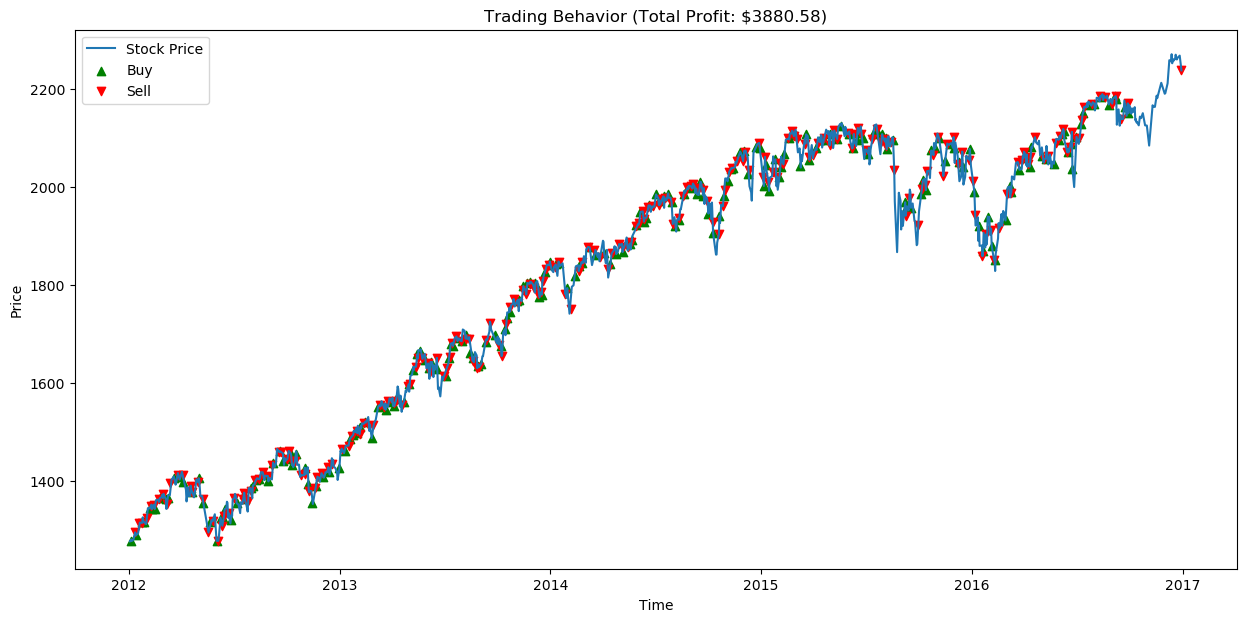

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df.index and test_prices are available
plt.figure(figsize=(15, 7))
plt.plot(df.index, test_prices, label='Stock Price')

# Extract buy and sell points from trades
buy_points = [trade[0] for trade in trades if trade[1] == 'buy']
sell_points = [trade[0] for trade in trades if trade[1] == 'sell']

# Plot buy and sell points
plt.scatter(df.index[buy_points], test_prices[buy_points], color='green', label='Buy', marker='^')
plt.scatter(df.index[sell_points], test_prices[sell_points], color='red', label='Sell', marker='v')

plt.title(f'Trading Behavior (Total Profit: ${total_profit:.2f})')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
